# I. Import library and dataset

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, confusion_matrix, classification_report
import warnings    
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

from sklearn.datasets import load_iris
import lime
import lime.lime_tabular

# Yêu cầu : Dự đoán khả năng thu hồi nợ của khách hàng (Fully Paid/ Charged off) dựa vào các đặc trưng trong dataset

# I. Dataset Discovery

In [128]:
df = pd.read_csv('C:\\Users\\namqt\\05.Project\\credit_train.csv')

In [129]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [131]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


### Một vài nhận xét về dataset
- Có giá trị na trong dataset
- Không có giá trị âm trong dataset

# II. Data understanding & Data preparation

## 2.1. Deal with na values

In [132]:
#First, we neet to delete few columns that do not make sense in the analysis
df.drop(columns = ['Loan ID', 'Customer ID'], inplace = True)

In [133]:
#Calculate the na total and na percent
def _na():
    na_total = df.isna().sum()
    na_percent = (100*na_total/ df.shape[0]).round(3)
    na_table = pd.concat([na_total, na_percent], axis = 1)
    na_table.columns = ['total', 'percent']
    na_table = na_table[na_table['total'] != 0].sort_values('percent', ascending = False)
    return na_table
_na()

,total,percent
Months since last delinquent,53655,53.381
Credit Score,19668,19.567
Annual Income,19668,19.567
Years in current job,4736,4.712
Bankruptcies,718,0.714
Tax Liens,524,0.521
Maximum Open Credit,516,0.513
Current Credit Balance,514,0.511
Number of Credit Problems,514,0.511
Number of Open Accounts,514,0.511


In [134]:
#month since last delinquent : Số tháng kể từ lần chậm trả gần nhất
#Na của cột này > 50 % nên ta sẽ loại bỏ nó 
df.drop(columns = 'Months since last delinquent', inplace = True)

In [135]:
#Let check the na of the columns has na < 1
df[df['Term'].isna()]
#The na from 100000 to 100513, seem like this is na totally. So we can remove it all
df.drop(index = range(100000, 100514), inplace = True)

In [136]:
_na()

,total,percent
Credit Score,19154,19.154
Annual Income,19154,19.154
Years in current job,4222,4.222
Bankruptcies,204,0.204
Tax Liens,10,0.010
Maximum Open Credit,2,0.002


In [137]:
#The na remaining which is below 1%. Let see what is this
df['Tax Liens'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., nan, 11., 15.,  9.,  7., 10.])

In [138]:
df['Maximum Open Credit'].unique()

array([ 416746.,  850784.,  750090., ..., 1287792., 2299198.,  892606.])

In [139]:
#Let see what Bankuptcies has
df['Bankruptcies'].unique()
#Seem like it's continuous feature

array([ 1.,  0.,  2.,  3., nan,  5.,  4.,  7.,  6.])

In [140]:
#Tax Lien and Maximum open credit, bankruptcies is continuous feature, but it have very small percent, so we can change it to mode
Tax_Max_na = ['Maximum Open Credit', 'Tax Liens', 'Bankruptcies']
for i in Tax_Max_na:
    mode_val = df[i].mode().iloc[0]
    df[i].fillna(mode_val, inplace = True)

In [141]:
_na()

,total,percent
Credit Score,19154,19.154
Annual Income,19154,19.154
Years in current job,4222,4.222


<Axes: xlabel='Years in current job', ylabel='Count'>

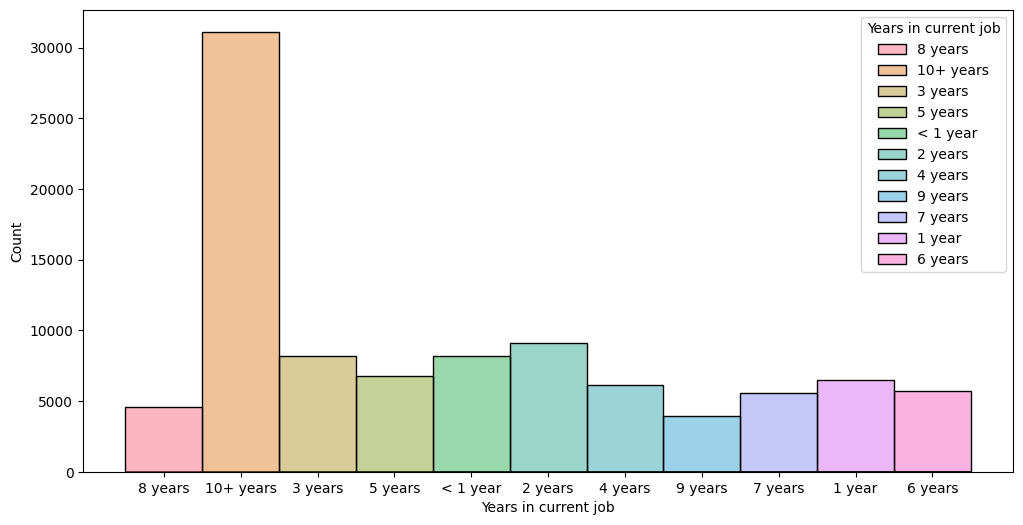

In [142]:
#Let check the years in current job
plt.figure(figsize = (12,6))
sns.histplot(df, x = 'Years in current job', hue = 'Years in current job')


In [143]:
#Seem like 10+ years has the largest number, we can fill na with this value
df['Years in current job'].fillna('10+ years', inplace = True)

In [144]:
_na()

,total,percent
Credit Score,19154,19.154
Annual Income,19154,19.154


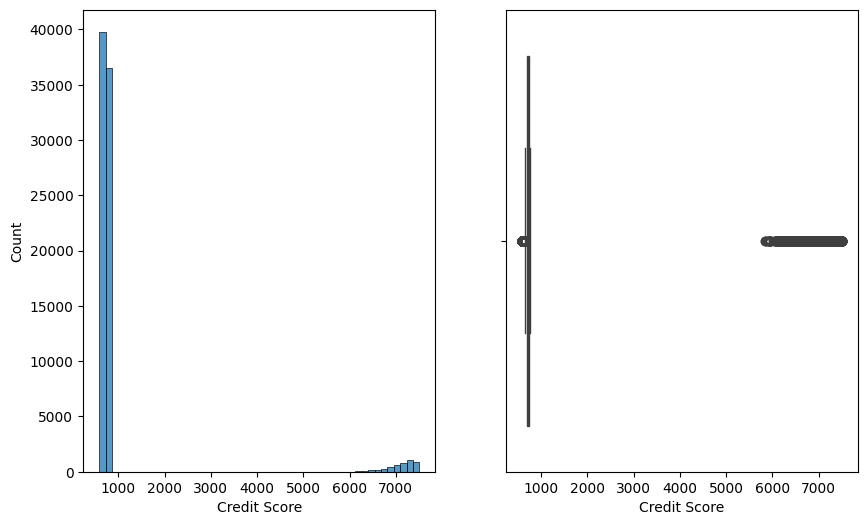

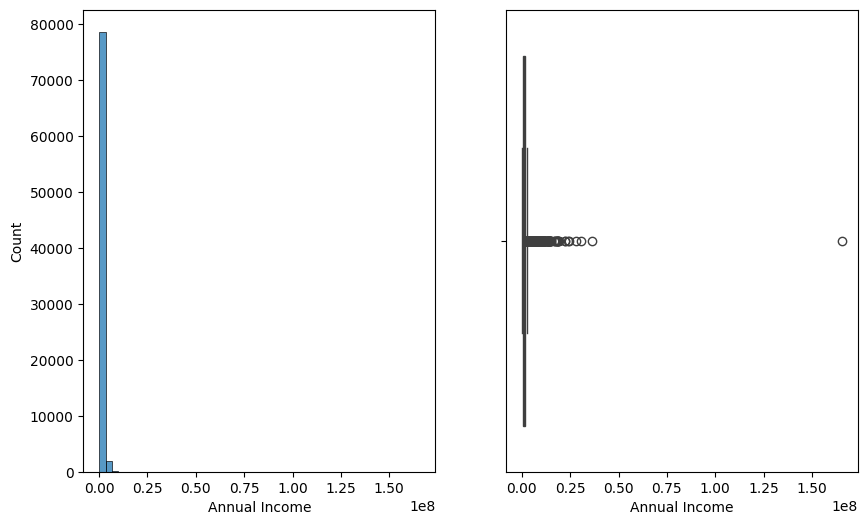

In [145]:
#Let's check the remaining columns
my_l = ['Credit Score', 'Annual Income']
for j, i in enumerate(my_l):
    fig, ax = plt.subplots(1,2,figsize = (10,6))
    sns.histplot(df, x = i, bins = 50, ax = ax[0])
    sns.boxplot(df, x = i, ax = ax[1])
    plt.show()


In [146]:
#Credit score và annual có lượng ngoại lai khá lớn và có giá trị ngoại lai lớn
#Nên chúng ta sẽ để những giá trị na là Median
for i in my_l: 
    df[i].fillna(df[i].median(), inplace = True)


## 2.2. Deal with duplicate values

In [147]:
df.duplicated().sum()
#We have 10215 duplicate values

10215

In [148]:
#Drop dulicate values
df.drop_duplicates(inplace = True)

In [149]:
df.duplicated().sum()

0

## 2.3. Change data type 

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89785 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89785 non-null  object 
 1   Current Loan Amount        89785 non-null  float64
 2   Term                       89785 non-null  object 
 3   Credit Score               89785 non-null  float64
 4   Annual Income              89785 non-null  float64
 5   Years in current job       89785 non-null  object 
 6   Home Ownership             89785 non-null  object 
 7   Purpose                    89785 non-null  object 
 8   Monthly Debt               89785 non-null  float64
 9   Years of Credit History    89785 non-null  float64
 10  Number of Open Accounts    89785 non-null  float64
 11  Number of Credit Problems  89785 non-null  float64
 12  Current Credit Balance     89785 non-null  float64
 13  Maximum Open Credit        89785 non-null  float64


In [151]:
#Change years in current job to numerical
df['Years in current job'] = df['Years in current job'].apply(lambda x: '11 years' if x == '10+ years' else '0.5 year'
                                                             if x == '< 1 year' else x)
df['Years in current job'] = df['Years in current job'].str.split().apply(lambda x: x[0])

In [152]:
df['Years in current job'] = df['Years in current job'].astype(float)
df['Years in current job']

0         8.0
1        11.0
2         8.0
3         3.0
4         5.0
         ... 
99994     1.0
99996     1.0
99997     6.0
99998     9.0
99999    11.0
Name: Years in current job, Length: 89785, dtype: float64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89785 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89785 non-null  object 
 1   Current Loan Amount        89785 non-null  float64
 2   Term                       89785 non-null  object 
 3   Credit Score               89785 non-null  float64
 4   Annual Income              89785 non-null  float64
 5   Years in current job       89785 non-null  float64
 6   Home Ownership             89785 non-null  object 
 7   Purpose                    89785 non-null  object 
 8   Monthly Debt               89785 non-null  float64
 9   Years of Credit History    89785 non-null  float64
 10  Number of Open Accounts    89785 non-null  float64
 11  Number of Credit Problems  89785 non-null  float64
 12  Current Credit Balance     89785 non-null  float64
 13  Maximum Open Credit        89785 non-null  float64


In [154]:
#Let check other object columns 
for i in ['Term', 'Home Ownership', 'Purpose']:
    print(f'{i} {df[i].unique()}')

Term ['Short Term' 'Long Term']
Home Ownership ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
Purpose ['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']


In [155]:
#All off these should be categorical_feature
categorical_feature = ['Term', 'Home Ownership', 'Purpose']

# III. Exploratory Data Analysis

## 3.1. Target feature

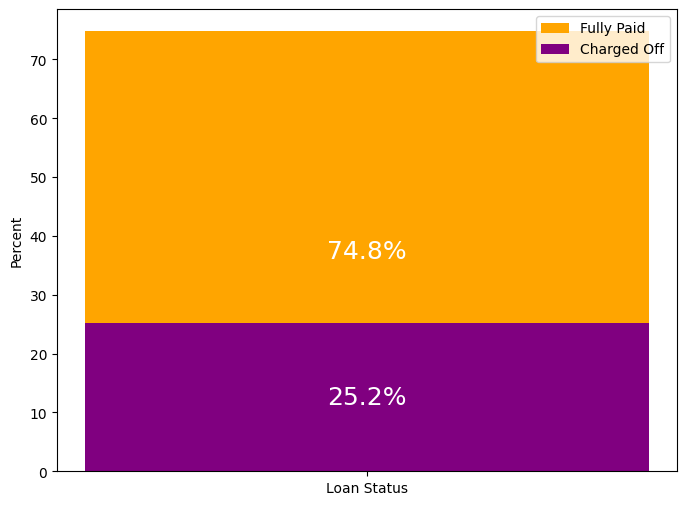

In [156]:
df_target = df.groupby('Loan Status').size().reset_index(name = 'Total')
df_target.columns = ['Loan Status', 'Total']
df_target['Percent'] = (100*df_target['Total']/len(df)).round(2) 
fig, ax =plt.subplots(figsize = (8,6))
ax2 = ax.bar('Loan Status', df_target[df_target['Loan Status'] == 'Fully Paid']['Percent'].values[0], color = 'orange', label = 'Fully Paid')
ax1 = ax.bar('Loan Status', df_target[df_target['Loan Status'] == 'Charged Off']['Percent'].values[0], color = 'purple', label = 'Charged Off')


for p in ax1.patches:
    percentage = p.get_height()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=18, color='white', xytext=(0, 0),
                        textcoords='offset points') 
for p in ax2.patches:
    percentage = p.get_height()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=18, color='white', xytext=(0, 0),
                        textcoords='offset points') 

ax.set_ylabel('Percent')
ax.legend()

In [157]:
#The target feature show that this is the imbalance target feature

## 3.2.Numerical Feature

In [158]:
numerical_feature = df.select_dtypes(include = [np.number]).columns.tolist()
len(numerical_feature)

12

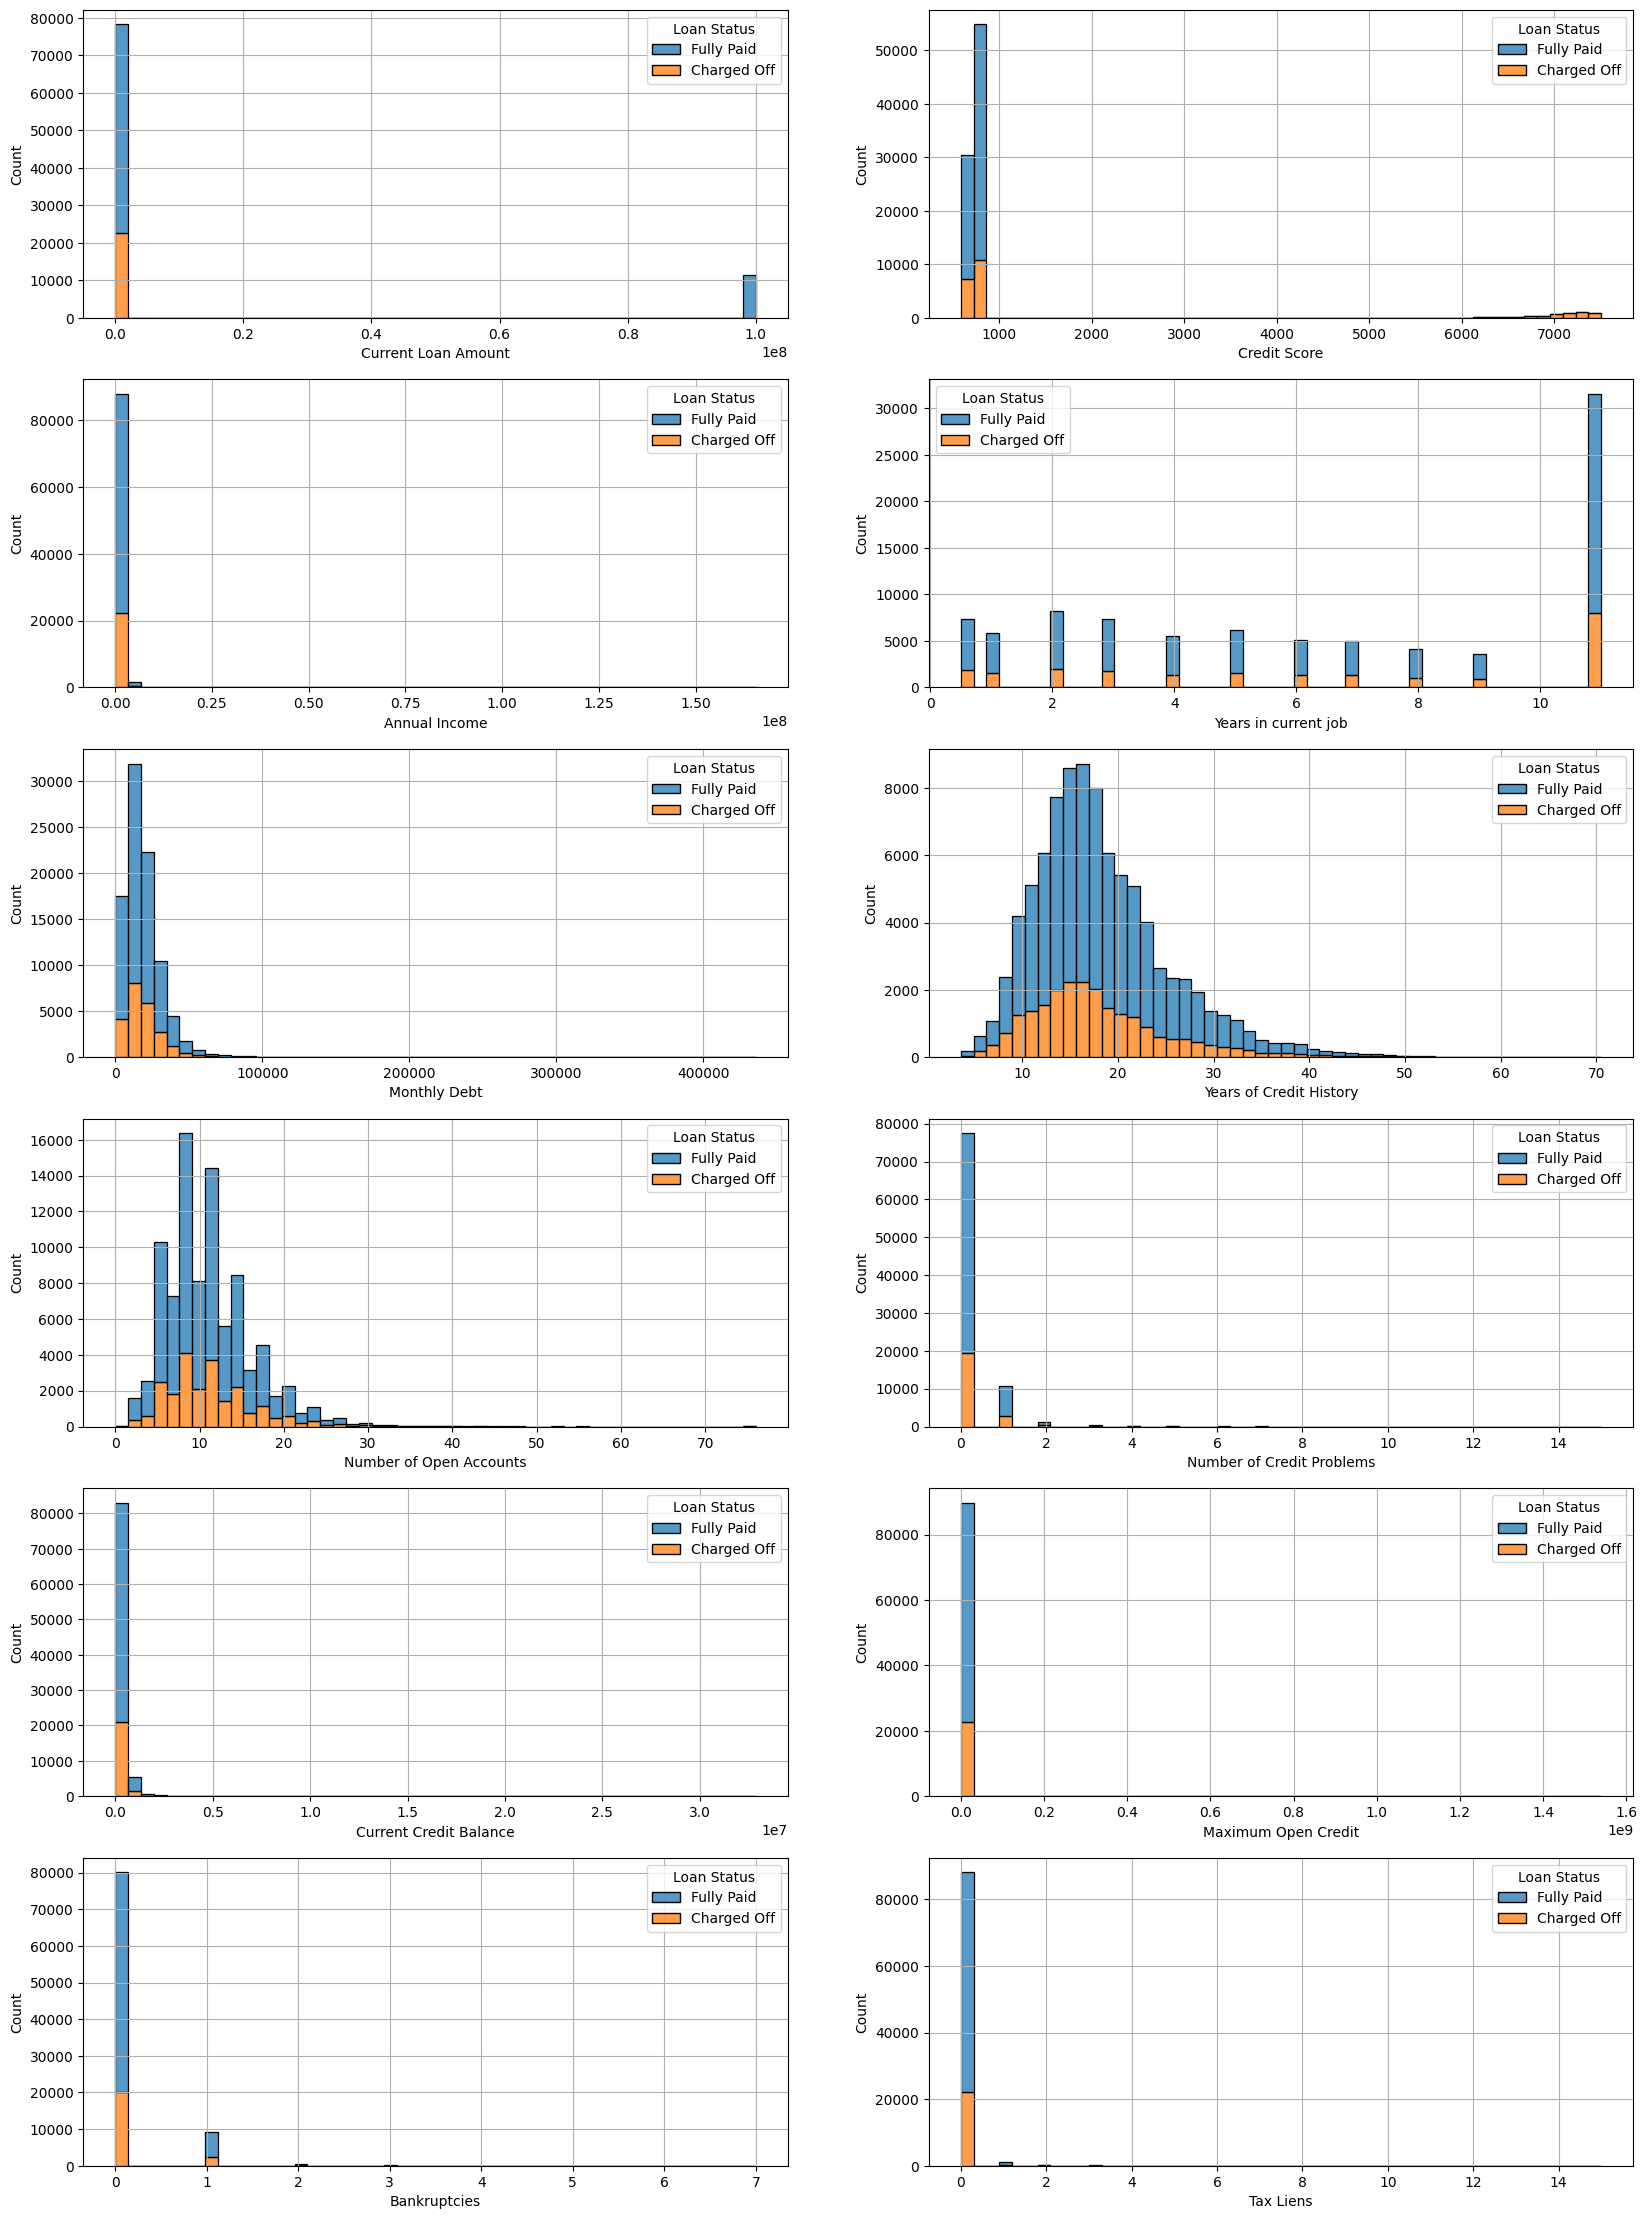

In [159]:
fig, ax = plt.subplots(6,2,figsize = (20,28))
for pos, i in enumerate(numerical_feature):  
    sns.histplot(df, x = i, stat = 'count', multiple = 'stack', bins = 50, hue = 'Loan Status', 
                ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].grid(True)
    sns.boxplot()

#### Overview of numerical features

Current loan amount: 

-Tập trung chủ yếu ở mức 10^5 , một số ngoại lai xuất hiện gần 10^8
- ở Mức 10^5, lượng fully paid rất cao, khoảng 80k data, lượng charged off bằng 1/4 fully paid
- ở mức ngoại lai gần 10^8$, có trên 10000 data và gần như đều là fully paid

Credit Score

- Tập trung ở mức dưới 1000 điểm. một số ngoại lai xuất hiện trên 6000 điểm
- Ở mức dưới 1000, lượng fully paid chiếm số lượng lớn, khoảng 3/4 (hơn 80k data)
- Ở mức ngoại lai trên 6000 điểm, tất cả gần như là charged off, điều này có thể làm
ảnh hưởng tới mối tương quan giữa Credit Score và Loan Status

Annual Income : 

- Tập trung ở mức dưới 1M$, tỉ lệ charged off = 1/4 so với fully paid

Years in current job

-Data tập trung ở mức trên 10 năm kinh nghiệm, trung bình tỉ lệ Fully paid chiếm tỉ lệ lớn
khoảng 2/3 tổng data

Monthly debt:

- Lượng vay tập trung dưới 50k$, 
- Tỉ lệ qua các nhóm phân loại khá đồng đều. Fully paid 2/3, charged off 1/3

Years in credit history:

- Biểu đồ phân bố khá đồng đều trong cả fully paid và charged off
- Số năm sử dụng tín dụng tập trung từ 12 cho đến 23 năm
- Số lượng nhỏ từ 50 năm trở lên

Number of open acocunt: 

- Lượng open account không đều, tập trung ở khoảng 5 đến 15 tài khoản
- Lượng fully paid lớn chiếm 4/5 tổng số data

Number of credit problems:

- Trải dài từ 0 đến hơn 14 problems, nhưng tập trung chủ yếu ở 0 problem. 
- Tỉ lệ charged off nhỏ, chiếm 1/5

Number of credit balance

- Tập trung trong khoảng 100K$ đến 1M. tỉ lệ charged off chiếm 1/5

Maximum open credit:

- Tập trung trong khoảng 10M đến dưới 50M

Tax Liens & Bankruptcies: 

Tập trung ở mức 0, tỉ lệ fully paid chiếm 4/5



### 3.3. Categorical feature

In [161]:
categorical_feature = df.select_dtypes(include = [object]).columns.tolist()
categorical_feature.remove('Loan Status')
categorical_feature
df['Purpose'] = df['Purpose'].replace('other', 'Other')

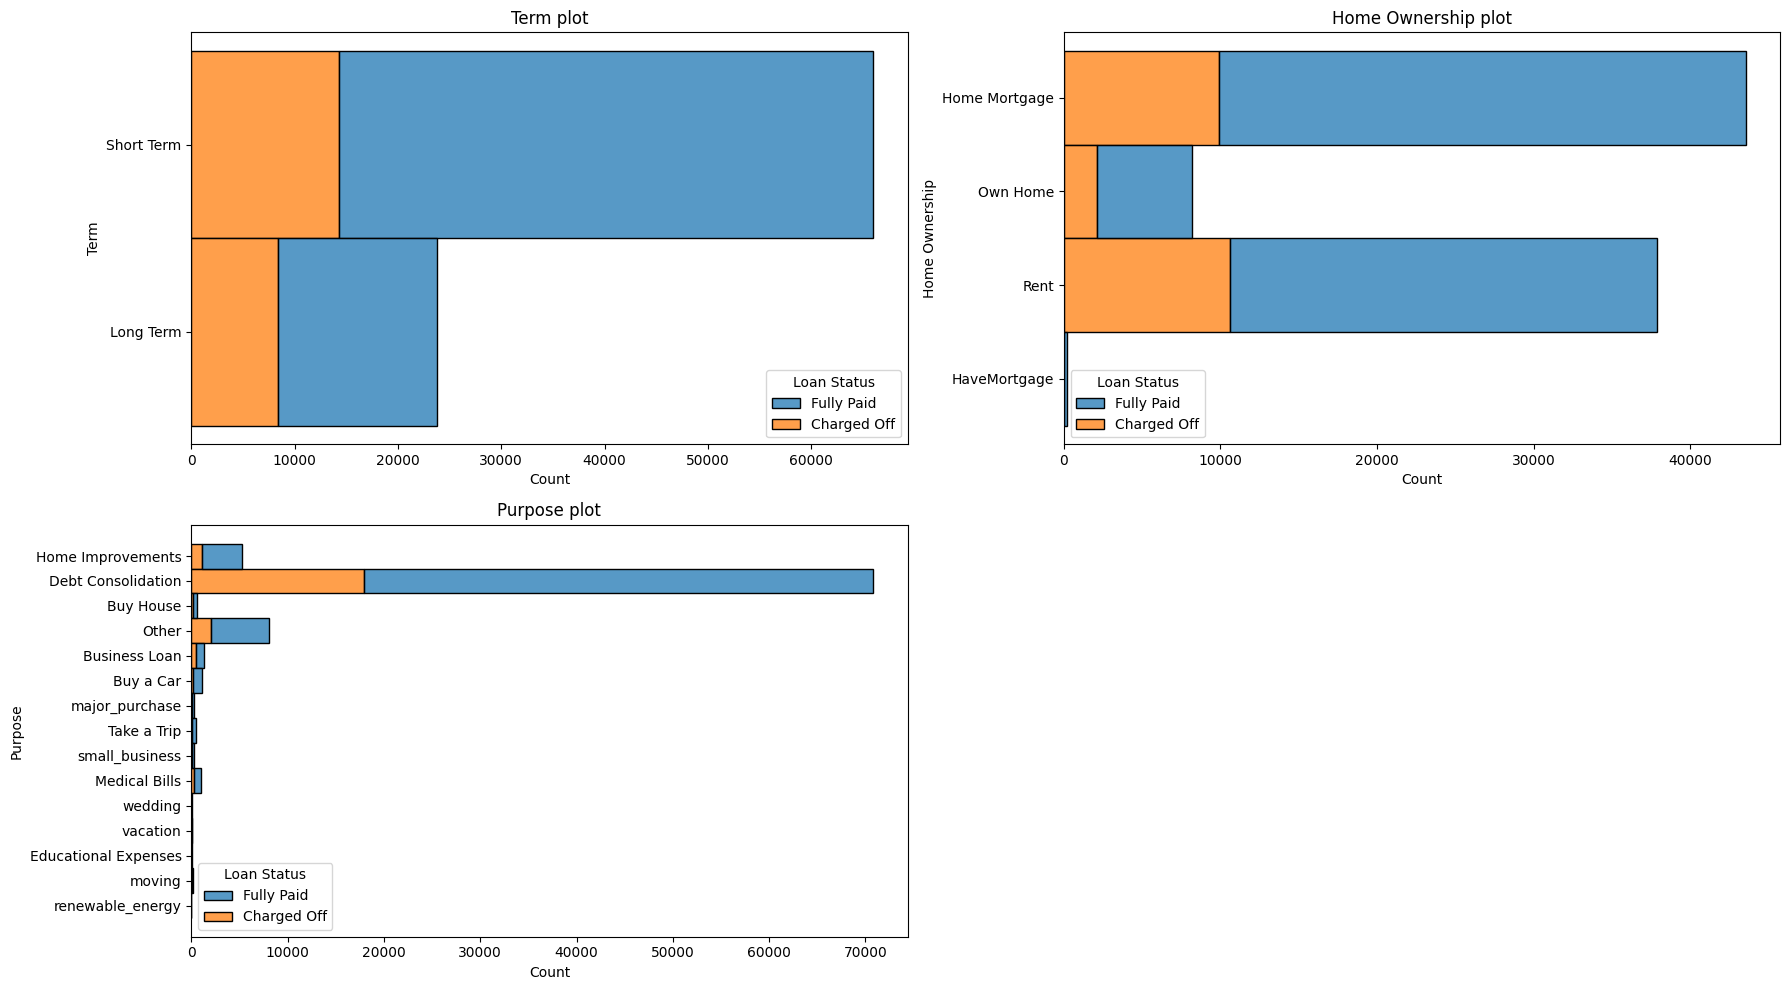

In [162]:
fig, ax = plt.subplots(2,2, figsize = (18,10))
for pos, i in enumerate(categorical_feature): 
    axp = sns.histplot(df, y = i, ax = ax[pos//2, pos %2], hue = 'Loan Status', multiple = 'stack', stat = 'count' )
    ax[pos//2, pos %2].set_title(f'{i} plot')


        
for pos in range(len(categorical_feature), 2*2):
    fig.delaxes(ax[pos//2, pos %2])
plt.tight_layout()
plt.show()

#### Overview of categorical_feature: 

Term : 

	- Các khoản vay ngắn hạn chiếm phần lớn trên tổng khoản vay, khoảng 70k
	- Tỉ lệ fully paid của các khoản vay ngắn hạn là 4/5
	- Các khoản vay dài hạn có khoảng 25k, tỉ lệ fully paid là 2/3
	-> Các khoản vay ngắn hạn chiếm tỉ lệ nhiều hơn cả về số lượng lẫn tỉ lệ fully paid

	-> Nguyên nhân có thể tới từ việc các khoản vay ngắn hạn thường là các khoản vay dùng để chi tiêu nhỏ, hoặc tới từ những người có nền tài chính ổn định có thể trả nợ. việc vay ngắn hạn cũng khiến người vay ý thức hơn về thời gian 

Home ownership :

	- Khoản vay có thế chấp(Have Mortgage) có tỉ lệ fully paid cao nhất, khoảng 90% nhưng dữ liệu tập trung thấp nhất so với các loại vay khác
	- Khoản vay thế chấp nhà (Home Mortgage) có tỉ lệ fully paid cao thứ 2, khoảng 80%, ngoài ra đây cũng là loại hình vay vốn có số lượng nhiều nhất.
	- Own home và ren là hai loại hình có tỉ lệ fully paid tương đương nhau, khoảng 70%, nhưng dữ liệu Rent khoảng 37k còn ownhome chỉ khoảng 10k
	-> Các khoản vay đều có tỉ lệ fully paid > 70%
	-> Các khoản vay tập trung chủ yếu với Home Mortgage, lí do là đây là tài sản có giá trị cao, dễ thế chấp.
	-> Các khoản vay có thế chấp khác(HaveMortgage), có tỉ lệ fully paid cao nhất do sự linh hoạt của việc trả nợ

Purpose: 

	- Mục đích của các khoản vay tập trung vào các khoản vay nhỏ lẻ rồi gộp lại(debt consolidation), ngoài ra còn có các khoản vay khác (Other) và cải thiện nhà cửa (Home Repairation)
	- Tỉ lệ fully paid khá cao > 50%
	- small business, newable_energy có tỉ lệ fully paid nhỏ hơn 60%, tuy nhiên 2 khoản này chiếm tỉ trọng nhỏ nhất trong các khoản vay

In [163]:
le = LabelEncoder()
for i in categorical_feature:
    df[i] = le.fit_transform(df[i])
df['Loan Status'] = le.fit_transform(df['Loan Status'])

<Axes: >

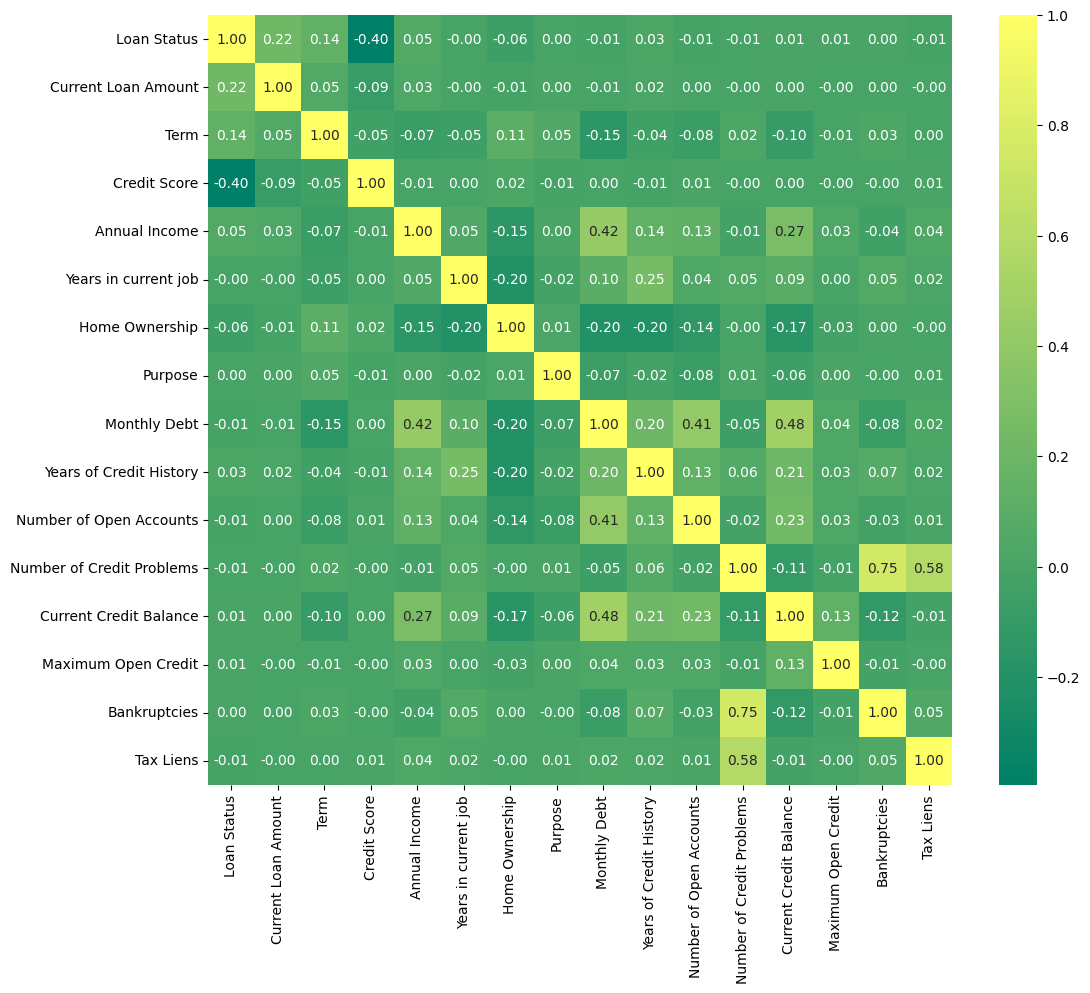

In [164]:
df_cor = df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(df_cor, annot = True, fmt = '.2f', cmap = 'summer' )

#### Các feature có ảnh hưởng lớn tới Loan Status

3 feature có ảnh hưởng lớn tới Loan Status

- Current Loan Amount
  
    Số tiền vay ảnh hưởng trực tiếp đến việc 1 người có trả được nợ hay không.
   
    Biểu đồ cho thấy có những khoản nợ rất lớn, lên tới 10^8 gần như 100% là fully paid. cho nên current loan và loan status đang có tương quan dương. 

    Việc Current Loan có tương quan tới Loan Status bởi các yếu tố như khả năng tài chính. Nói cách khác, Tuỳ thuộc vào tình hình tài chính của khách
hàng, và khối lượng tiền họ vay sẽ ảnh hưởng trực tiếp tới Loan Status

- Term
  
    Kì hạn vay có tương quan tới việc một khác hàng có trả được nợ hay không
    Biểu đồ cho thấy rằng, các khách hàng sử dụng kì hạn vay ngắn, có khả năng trả nợ cao hơn so với những khoản vay dài hạn. Khối lượng khách hàng sử dụng kì hạn vay ngắn chiếm tỉ trọng lớn. Cho nên Term và Loan Status có tương quan dương. 
    80% số người dùng kì hạn vay ngắn có tỉ lệ trả fully paid
    65% số người dùng kì hạn vay dài có tỉ lệ trả fully paid

- Credit Score
  
    Điểm tín dụng có tương quan lớn tới việc khách hàng có trả được nợ hay không
    Tuy nhiên, Heatmap cho ta thấy biểu đồ đang có tương quan âm giữa Credit Score và Loan Status. Nguyên nhân tới từ việc có một vài điểm tín dụng cao bất thường (từ 6000 trở lên) và những người này gần như là charged off. Cho nên biểu đồ có tự tương quan âm.
  
    Nếu loại bỏ những điểm này, thì ta có thể thấy điểm tín dụng càng lớn thì tỉ lệ fully paid càng lớn. 
    

# IV. Feature selection & Modeling

## 4.1. Select the model

#### Đây là bài toán dự đoán biến nhị phân. Nên ta sẽ sử dụng những phương pháp để dự đoán nhị phân

In [165]:
classifiers = {
    'LogisticRegression' : LogisticRegression(random_state = 42)
    ,'DecisionTree' : DecisionTreeClassifier(random_state = 42)
    ,'RandomForest' : RandomForestClassifier(random_state = 42)
    ,'Gradient Boosting' : GradientBoostingClassifier(random_state = 42)
    ,'KNN' : KNeighborsClassifier()
}

In [166]:
x = df.drop(columns = 'Loan Status')
y = df['Loan Status']

In [167]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
scaled = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled[numerical_feature] = scaled.fit_transform(x_train_scaled[numerical_feature])
x_test_scaled[numerical_feature] = scaled.transform(x_test_scaled[numerical_feature])

In [168]:
accuracy_df = pd.DataFrame()
f1_score_df = pd.DataFrame()
for name, model in classifiers.items():
    print(f'{name}.....')
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'Accuracy Score : {accuracy}')
    print(f'F1_score : {f1}')
    print(classification_report(y_test, y_pred))
    
    A_score = pd.DataFrame({'name': [name], 'score' : [accuracy]}) 
    accuracy_df = pd.concat([accuracy_df, A_score], ignore_index = True)
    
    F_score = pd.DataFrame({'name': [name], 'score': [f1]})
    f1_score_df  = pd.concat([f1_score_df, F_score], ignore_index = True)
    

LogisticRegression.....
Accuracy Score : 0.7954001225148967
F1_score : 0.8791924240431409
              precision    recall  f1-score   support

           0       1.00      0.20      0.33      4584
           1       0.78      1.00      0.88     13373

    accuracy                           0.80     17957
   macro avg       0.89      0.60      0.61     17957
weighted avg       0.84      0.80      0.74     17957

DecisionTree.....
Accuracy Score : 0.7061313136938241
F1_score : 0.8012653937408203
              precision    recall  f1-score   support

           0       0.43      0.45      0.44      4584
           1       0.81      0.80      0.80     13373

    accuracy                           0.71     17957
   macro avg       0.62      0.62      0.62     17957
weighted avg       0.71      0.71      0.71     17957

RandomForest.....
Accuracy Score : 0.7947318594420003
F1_score : 0.8771579017529827
              precision    recall  f1-score   support

           0       0.84      0.24

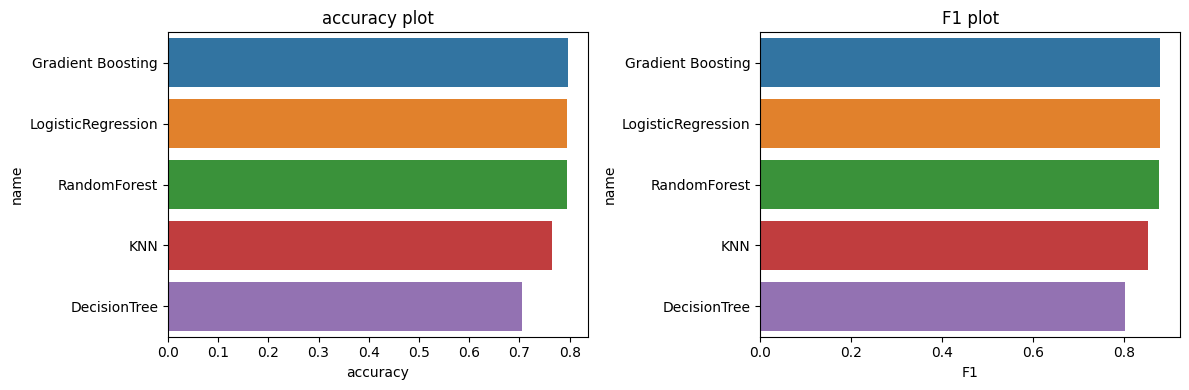

In [169]:
accuracy_df.sort_values('score', ascending = False, inplace = True)
f1_score_df.sort_values('score', ascending = False, inplace = True)
fig, ax = plt.subplots(1,2, figsize = (12,4))
accuracy_f1 = pd.merge(accuracy_df, f1_score_df, on = 'name')
accuracy_f1.columns = ['name', 'accuracy', 'F1']
for p,i in enumerate(['accuracy', 'F1']):
    sns.barplot(accuracy_f1, x = i, y = 'name', ax = ax[p], hue = 'name')
    ax[p].set_title(i + ' plot')
plt.tight_layout()
plt.show()

#### 
Có thể thấy, 3 phương pháp Gradient Boosting, Logistic Regression và RandomForest đều có kết quả
tương đương nhau và cao nhất. 

## 4.2. Feature importance

## 

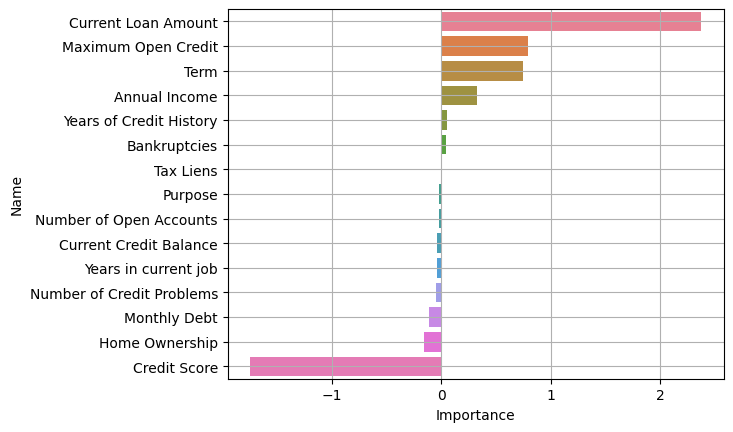

In [170]:
#Logistic Regression importance feature
model = LogisticRegression(random_state = 42)
model.fit(x_train_scaled, y_train)
importance = model.coef_[0]
importance_feature = pd.DataFrame({'Name':x.columns, 'Importance': importance}).sort_values('Importance', ascending = False).reset_index(drop = True)
sns.barplot(importance_feature, x = 'Importance', y = 'Name', hue = 'Name')
plt.grid(True)

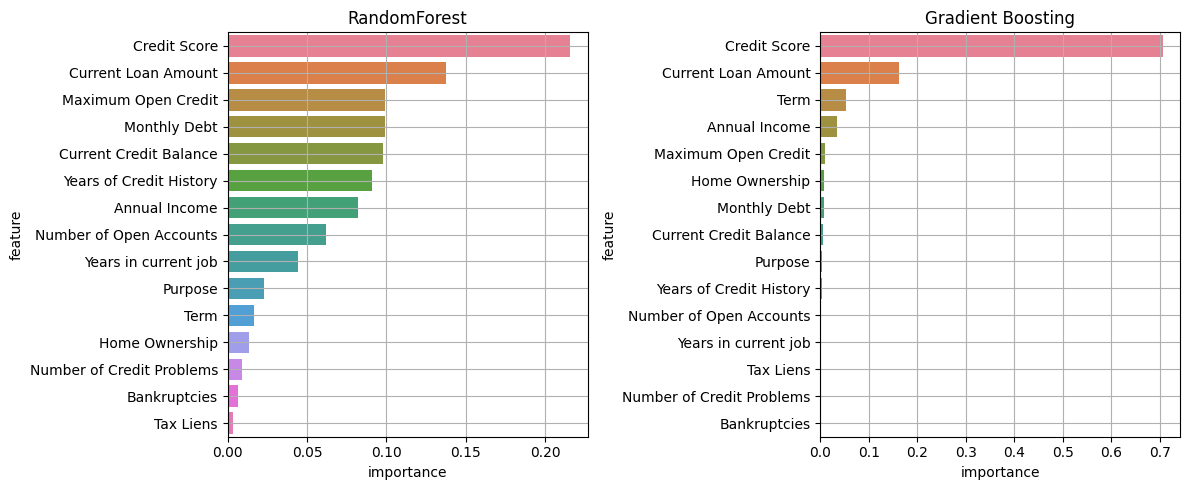

In [171]:
#Gradiant and random forest importance
classifiers = {
    'RandomForest' : RandomForestClassifier(random_state = 42)
    ,'Gradient Boosting' : GradientBoostingClassifier(random_state = 42)
}
fig, ax = plt.subplots(1,2, figsize = (12,5))
for j, i in enumerate(classifiers):
    model = classifiers[i]
    model.fit(x_train_scaled, y_train)
    importance = model.feature_importances_
    
    feature_importance = pd.DataFrame({'feature': x.columns, 'importance': importance}).sort_values('importance', ascending = False)
    sns.barplot(feature_importance, x = 'importance', y = 'feature', hue = 'feature', ax = ax[j])
    ax[j].set_title(i)
    ax[j].grid(True)
plt.tight_layout()
plt.show()

#### 
Theo ba plot, ta đều thấy, Credit Score, Current Loan Amouunt, Term là ba feature có ảnh hưởng lớn nhất
tới mô hình. 

## 4.3. LIME

In [172]:
model = GradientBoostingClassifier()
model.fit(x_train_scaled, y_train)

x_train_scaled_np = x_train_scaled.values
x_test_scaled_np = x_test_scaled.values
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_scaled_np, mode="classification", feature_names=x.columns, class_names=model.classes_)
exp = explainer.explain_instance(x_test_scaled.iloc[0], model.predict_proba, num_features=len(x.columns))
exp.show_in_notebook(show_table=True, show_all=False)
exp.as_list()

[('Current Loan Amount > -0.38', 0.19398589131537),
 ('Credit Score <= -0.23', 0.08595801114480602),
 ('Term <= 0.00', -0.05841638324365945),
 ('Annual Income > 0.16', 0.05611058017297245),
 ('Tax Liens <= -0.11', 0.05177724059075187),
 ('Home Ownership <= 1.00', 0.026759559914541695),
 ('-0.86 < Years in current job <= -0.11', 0.019219882689164452),
 ('Bankruptcies <= -0.33', 0.010814187684430765),
 ('-0.23 < Number of Open Accounts <= 0.57', -0.009569212031791827),
 ('-0.68 < Monthly Debt <= -0.19', 0.00893769342431109),
 ('Number of Credit Problems <= -0.34', 0.004548734622270776),
 ('-0.22 < Current Credit Balance <= 0.19', -0.004204285412969905),
 ('-0.03 < Maximum Open Credit <= 0.00', -0.004140418681350303),
 ('Purpose <= 3.00', 0.003146913197765383),
 ('-0.67 < Years of Credit History <= -0.18', -0.000499479849427486)]

In [173]:
def values(columns, x_scale):
    std = df[columns].std()
    mean = df[columns].mean()
    x_scale = x_scale
    x = (std*x_scale)+ mean
    return x

In [174]:
original_value = values('Current Loan Amount', -0.38)
print("Giá trị ban đầu:", original_value)

Giá trị ban đầu: 408582.0755632166


In [175]:
original_value = values('Credit Score', -0.28)
print("Giá trị credit score:", original_value)

Giá trị credit score: 651.1025540724812


In [184]:
# Trong hàng [0]: 
# Current loan amount đóng góp lớn nhất vào dự đoán lớp 1 (0.21)
# Credit score đóng góp lớn nhất vào lớp 0 -0.23
# Annual income đóng góp vào lớp 1 : 0.08

In [ ]:
df.to_csv('EDA_final.csv', index = False)